In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [38]:
## make dataset
from sklearn.datasets import make_classification

In [42]:
X,Y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

In [43]:
X=pd.DataFrame(X,columns=['f1','f2'])

<AxesSubplot: xlabel='f1', ylabel='f2'>

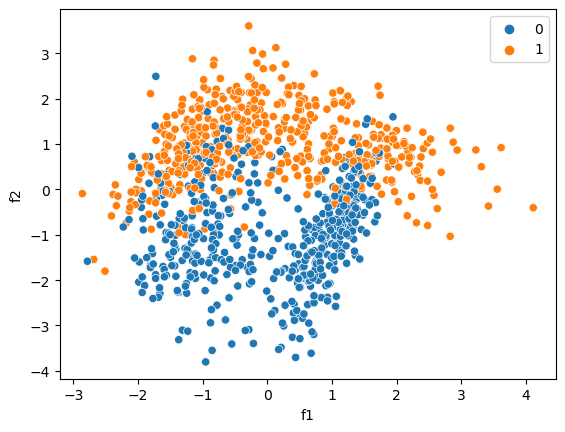

In [44]:
sns.scatterplot(data=X,x='f1',y='f2',hue=Y)

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=10)

In [47]:
from sklearn.svm import SVC

In [48]:
svc=SVC(kernel='linear')

In [50]:
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [51]:
svc.coef_

array([[-0.07848198,  1.46350016]])

In [52]:
## prediction
y_pred=svc.predict(x_test)

In [53]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1])

In [59]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [60]:
confusion_matrix(y_test,y_pred)

array([[107,  23],
       [ 11, 109]])

In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86       130
           1       0.83      0.91      0.87       120

    accuracy                           0.86       250
   macro avg       0.87      0.87      0.86       250
weighted avg       0.87      0.86      0.86       250



In [62]:
accuracy_score(y_test,y_pred)

0.864

## Hyperparameter Tuning

In [79]:
parameter={'C':[0.1,1,10,100,1000],
          'gamma':[1,0.1,0.01,0.001,0.0001],
           'kernel':['linear']
          }

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
gsc=GridSearchCV(SVC(),param_grid=parameter,refit=True,cv=5,verbose=3)##verbose will show the fitting of model

In [82]:
gsc.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.860 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.820 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.900 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.807 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.900 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.860 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.820 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.900 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.807 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.900 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.860 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [83]:
gsc.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [84]:
gsc.best_score_

0.8573333333333334

In [85]:
y_pred=gsc.predict(x_test)

In [86]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[106  24]
 [ 10 110]]
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       130
           1       0.82      0.92      0.87       120

    accuracy                           0.86       250
   macro avg       0.87      0.87      0.86       250
weighted avg       0.87      0.86      0.86       250

0.864
